In [1]:
import os
os.chdir('../')
os.getcwd()

'e:\\github_clone\\end-to-end-game-engagement-classification-project'

In [2]:
import numpy as np
import torch
import pandas as pd
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from src.utils import save_object
from src.components import EngageModel
from src.components import DataPreprocessor

In [3]:
train_csv_path = 'artifacts\\train.csv'
test_csv_path = 'artifacts\\test.csv'
target_column = 'EngagementLevel'

data_preprocessor = DataPreprocessor(train_csv_path, test_csv_path, target_column)

# Load and encode the data
df_train, df_test = data_preprocessor.load_and_encode_data()
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = data_preprocessor.to_tensors(df_train, df_test)

In [5]:
print(f"{X_train_tensor.shape}, {y_train_tensor.shape}, {X_test_tensor.shape}, {y_test_tensor.shape}")

torch.Size([32027, 11]), torch.Size([32027]), torch.Size([8007, 11]), torch.Size([8007])


In [6]:
model = EngageModel(11, 3, path="artifacts\\testModel.pth")

In [7]:
model.train(X_train_tensor, y_train_tensor, epochs=100, batch_size=32)

Epoch 1/100, Loss: 0.6638582944869995, Training Accuracy: 0.7872
Model saved at artifacts\testModel.pth
Epoch 2/100, Loss: 0.3246174454689026, Training Accuracy: 0.8003
Model saved at artifacts\testModel.pth
Epoch 3/100, Loss: 0.6159190535545349, Training Accuracy: 0.8251
Model saved at artifacts\testModel.pth
Epoch 4/100, Loss: 0.531983494758606, Training Accuracy: 0.8346
Model saved at artifacts\testModel.pth
Epoch 5/100, Loss: 0.6278434991836548, Training Accuracy: 0.8404
Model saved at artifacts\testModel.pth
Epoch 6/100, Loss: 0.4525383412837982, Training Accuracy: 0.8431
Model saved at artifacts\testModel.pth
Epoch 7/100, Loss: 0.23392945528030396, Training Accuracy: 0.8592
Model saved at artifacts\testModel.pth
Epoch 8/100, Loss: 0.4168712794780731, Training Accuracy: 0.8603
Model saved at artifacts\testModel.pth
Epoch 9/100, Loss: 0.4712221026420593, Training Accuracy: 0.8666
Model saved at artifacts\testModel.pth
Epoch 10/100, Loss: 0.2671230733394623, Training Accuracy: 0.855

In [9]:
model.load_model()
test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy:.4f}')

Model loaded
Test Accuracy: 0.9122


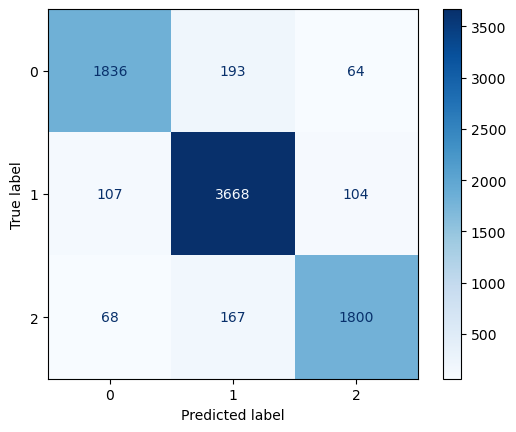

array([[1836,  193,   64],
       [ 107, 3668,  104],
       [  68,  167, 1800]], dtype=int64)

In [10]:
model.compute_confusion_matrix(X_test_tensor, y_test_tensor)